# Python and R

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# show all columns on pandas dataframes
pd.set_option('display.max_columns', None)


In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports

require('tidyverse')


R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Read the data



The cell below loads the data in python:

In [4]:
df = pd.read_csv('raw-polls.csv')
df.sample(5)

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,methodology,partisan,polldate,samplesize,cand1_name,cand1_id,cand1_party,cand1_pct,cand2_name,cand2_id,cand2_party,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,bias,rightcall,comment
8061,47349,74135,94,2016,2016_Pres-G_US,US,Pres-G,Pres-G,Ipsos,154,Online,NaN,10/20/16,1153.0,Hillary Rodham Clinton,9207,DEM,44.15,Donald Trump,9849,REP,35.45,6.6,8.7,11/8/16,48.13,46.03,2.10,6.60,1.0,for Reuters; average of multiple versions or t...
3822,2192,2767,7414,2008,2008_Pres-D_PA,PA,Pres-P,Pres-D,American Research Group,9,Live Phone,NaN,4/21/08,600.0,Hillary Rodham Clinton,45,DEM,56.00,Barack Obama,41,DEM,40.00,NaN,16.0,4/22/08,54.57,45.43,9.14,NaN,1.0,NaN
4209,64426,118509,4414,2008,2008_House-G_TX-22,TX-22,House-G,House-G,Zogby Interactive/JZ Analytics,395,Online,NaN,10/21/08,404.0,Nicholas V. Lampson,13826,DEM,36.00,Pete Olson,13827,REP,53.00,NaN,-17.0,11/4/08,45.36,52.43,-7.07,-9.93,1.0,NaN
656,6398,30943,1703,2000,2000_Sen-G_NY,NY,Sen-G,Sen-G,Blum & Weprin Associates,32,Live Phone,NaN,10/24/00,850.0,Hillary Rodham Clinton,3819,DEM,50.00,Rick Lazio,3821,REP,43.00,NaN,7.0,11/7/00,55.27,43.01,12.27,-5.27,1.0,NaN
5594,32774,82269,4860,2010,2010_House-G_UT-1,UT-1,House-G,House-G,Dan Jones & Associates,70,Live Phone,NaN,10/27/10,375.0,Morgan E. Bowen,10990,DEM,21.00,Rob Bishop,10991,REP,66.00,NaN,-45.0,11/2/10,23.93,69.19,-45.27,0.27,1.0,NaN


The cell below loads the same data in R:

In [5]:
%%R

df <- read_csv('raw-polls.csv')

df

Rows: 10776 Columns: 31
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): race, location, type_simple, type_detail, pollster, methodology, p...
dbl (17): poll_id, question_id, race_id, year, pollster_rating_id, samplesiz...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 10,776 × 31
   poll_id questio…¹ race_id  year race  locat…² type_…³ type_…⁴ polls…⁵ polls…⁶
     <dbl>     <dbl>   <dbl> <dbl> <chr> <chr>   <chr>   <chr>   <chr>     <dbl>
 1   26013     87909    1455  1998 1998… NY      Gov-G   Gov-G   Blum &…      32
 2   26255     87926    1456  1998 1998… OH      Gov-G   Gov-G   Univer…     346
 3   26026     31266    1736  1998 1998… NV      Sen-G   Sen-G   FM3 Re…      91
 4   26013     31253    1738  1998 1998… NY      Sen-G   Sen-G   Blum &…      32
 5   63632    117103    1738  1998 1998… NY      Sen-G 

# Guided Exploration

In this section you'll make a few charts to explore the data. Here I will raise some questions for you to dig around in the data and answer. You can use summary statistics and/or charts to help answer the questions. You will have to make some methodological choices along the way. Be aware of what choices you're making! I'll ask you about them shortly.


## Question 1: How accurate are polls from the following pollsters?
Characterize the accuracy of each of these pollsters in a sentence or two. Then, write another few sentences justifying your characterization with insights from the data.
- Siena College/The New York Times Upshot
- Jayhawk Consulting
- Fox News/Beacon Research/Shaw & Co. Research
- Brown University
- American Research Group


👉 **Siena College/The New York Times Upshot** 

In [35]:
%%R
nyt_df <- df %>%
    filter(pollster=='Siena College/The New York Times Upshot') # Filter data to polls for  Siena College/The New York Times Upshot only

In [36]:
nyt_df.head()

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,methodology,partisan,polldate,samplesize,cand1_name,cand1_id,cand1_party,cand1_pct,cand2_name,cand2_id,cand2_party,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,bias,rightcall,comment
8112,47325,74070,52,2016,2016_Gov-G_NC,NC,Gov-G,Gov-G,Siena College/The New York Times Upshot,448,Live Phone,NaN,10/22/16,792.0,Roy A. Cooper,8967,DEM,51.0,Pat McCrory,8959,REP,45.0,NaN,6.0,11/8/16,49.02,48.80,0.22,5.78,1.0,for New York Times | New York Times Upshot
8116,47325,74050,62,2016,2016_Sen-G_NC,NC,Sen-G,Sen-G,Siena College/The New York Times Upshot,448,Live Phone,NaN,10/22/16,792.0,Deborah K. Ross,10153,DEM,47.0,Richard Burr,8963,REP,46.0,NaN,1.0,11/8/16,45.37,51.06,-5.70,6.70,0.0,for New York Times | New York Times Upshot
8137,47325,74047,629,2016,2016_Pres-G_NC,NC,Pres-G,Pres-G,Siena College/The New York Times Upshot,448,Live Phone,NaN,10/22/16,792.0,Hillary Rodham Clinton,9207,DEM,47.5,Donald Trump,9849,REP,40.0,8.0,7.5,11/8/16,46.17,49.83,-3.66,11.16,0.0,for New York Times | New York Times Upshot; av...
8189,47551,74389,86,2016,2016_Sen-G_PA,PA,Sen-G,Sen-G,Siena College/The New York Times Upshot,448,Live Phone,NaN,10/24/16,824.0,Kathleen Alana McGinty,8985,DEM,47.0,Patrick J. Toomey,8966,REP,44.0,NaN,3.0,11/8/16,47.34,48.77,-1.43,4.43,0.0,for New York Times Upshot
8203,47551,74387,640,2016,2016_Pres-G_PA,PA,Pres-G,Pres-G,Siena College/The New York Times Upshot,448,Live Phone,NaN,10/24/16,824.0,Hillary Rodham Clinton,9207,DEM,47.5,Donald Trump,9849,REP,40.5,6.0,7.0,11/8/16,47.46,48.18,-0.72,7.72,0.0,for New York Times Upshot; average of multiple...


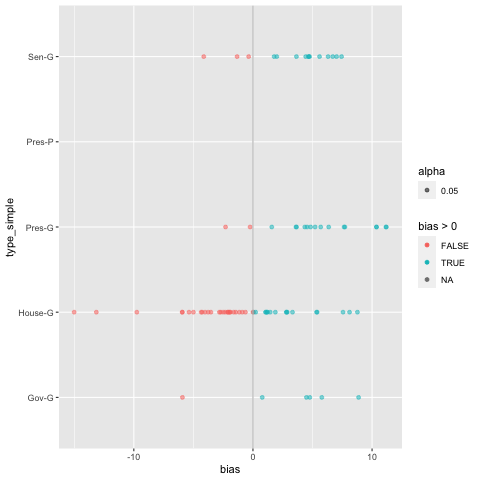

In [29]:
%%R

ggplot(nyt_df) +
    aes(x=bias, y=type_simple, color=bias>0, alpha=.05) +
    geom_point() +
    geom_vline(aes(xintercept=0), color='grey')

👉 **Jayhawk Consulting**

In [44]:
jay_df=df[df.pollster.str.contains("Jayhawk")]

In [45]:
jay_df

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,methodology,partisan,polldate,samplesize,cand1_name,cand1_id,cand1_party,cand1_pct,cand2_name,cand2_id,cand2_party,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,bias,rightcall,comment
7325,36081,49015,5495,2014,2014_House-G_KS-1,KS-1,House-G,House-G,Jayhawk Consulting Services,157,Live Phone,D,10/26/14,400.0,James E. Sherow,5342,DEM,45.0,Tim Huelskamp,5335,REP,38.0,NaN,7.0,11/4/14,32.03,67.97,-35.94,42.94,0.0,for James E. Sherow
9146,56550,90986,330,2018,2018_House-G_KS-1,KS-1,House-G,House-G,Jayhawk Consulting Services,157,Live Phone,D,10/23/18,600.0,Alan LaPolice,11713,DEM,38.0,Roger Marshall,11714,REP,42.0,NaN,-4.0,11/6/18,31.85,68.15,-36.29,32.29,1.0,for Alan LaPolice


In [31]:
%%R
jay_df <- df %>%
    filter(pollster=='Jayhawk Consulting')

In [34]:
%%R
jay_df

# A tibble: 0 × 31
# … with 31 variables: poll_id <dbl>, question_id <dbl>, race_id <dbl>,
#   year <dbl>, race <chr>, location <chr>, type_simple <chr>,
#   type_detail <chr>, pollster <chr>, pollster_rating_id <dbl>,
#   methodology <chr>, partisan <chr>, polldate <chr>, samplesize <dbl>,
#   cand1_name <chr>, cand1_id <dbl>, cand1_party <chr>, cand1_pct <dbl>,
#   cand2_name <chr>, cand2_id <dbl>, cand2_party <chr>, cand2_pct <dbl>,
#   cand3_pct <dbl>, margin_poll <dbl>, electiondate <chr>, …
# ℹ Use `colnames()` to see all variable names


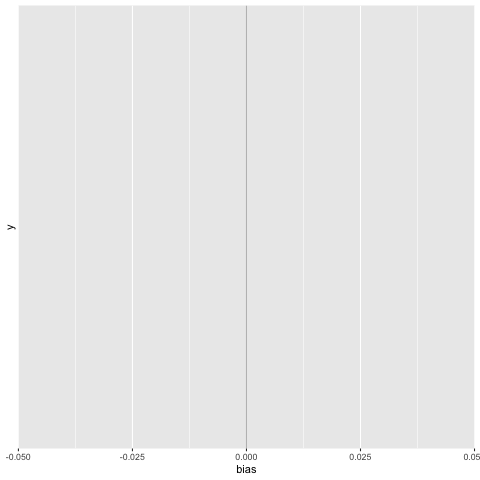

In [39]:
%%R

ggplot(jay_df) +
    aes(x=bias, y=1, color=bias>0, alpha=.05) +
    geom_point() +
    geom_vline(aes(xintercept=0), color='grey')

👉 **Fox News/Beacon Research/Shaw & Co. Research**

👉 **Brown University**

👉 **American Research Group**

### Question 2: Which pollsters are the most accurate? Which are the least accurate?

👉 Which pollsters are the most accurate?

👉 Which are the least accurate?

### Question 2 Reflections

👉 Write a summary paragraph explaining how you decided what constitutes “most accurate” and "least accurate"?


👉 In bullet point form, name **methodological choices** you made in the process of determining which pollsters were the most and least accurate.


👉 In bullet point form, list the **limitations** of your approach 
